**Importing Libraries** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib


**Data Load**

In [2]:
df = pd.read_csv("MySQL to Data.csv")

In [3]:
df.head()

,Customer_Id,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CustomerStatus,ComplainRecieved,warehousetohomerange,TenureRange,cashbackamountrange
0,50001,1,4.000000,phone,3,6,Debit Card,Female,3.00000,3,...,11,1,1,5,160,Churned,Yes,Very close distance,6 Months,Moderate Cashback Amount
1,50002,1,8.063592,Phone,1,8,UPI,Male,3.00000,4,...,15,2,1,4,121,Churned,Yes,Very close distance,1 Year,Moderate Cashback Amount
2,50003,1,8.063592,Phone,1,30,Debit Card,Male,2.00000,4,...,14,2,1,3,120,Churned,Yes,Moderate distance,1 Year,Moderate Cashback Amount
3,50004,1,0.000000,Phone,3,15,Debit Card,Male,2.00000,4,...,23,2,1,3,134,Churned,No,Close distance,6 Months,Moderate Cashback Amount
4,50005,1,0.000000,Phone,1,12,CC,Male,2.77242,3,...,11,1,1,3,130,Churned,No,Close distance,6 Months,Moderate Cashback Amount


**Data Preprocessing**

In [4]:
df.describe()

,Customer_Id,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000,4293.000000
mean,52821.184253,0.179362,8.559466,1.675518,15.554391,2.937099,3.682972,3.064291,4.072909,0.280224,15.672257,2.006522,2.685535,4.617284,159.416492
std,1624.146926,0.383700,7.432021,0.923065,8.160216,0.701520,1.028431,1.380217,2.556363,0.449161,3.631945,1.454323,2.420761,3.106835,26.080702
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,1.000000,1.000000,0.000000
25%,51404.000000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.000000
50%,52817.000000,0.000000,8.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,2.000000,2.000000,4.000000,155.000000
75%,54219.000000,0.000000,13.000000,3.000000,20.000000,3.000000,4.000000,4.000000,5.000000,1.000000,18.000000,2.000000,3.000000,7.000000,175.000000
max,55630.000000,1.000000,51.000000,3.000000,36.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_Id                  4293 non-null   int64  
 1   Churn                        4293 non-null   int64  
 2   Tenure                       4293 non-null   float64
 3   PreferredLoginDevice         4293 non-null   object 
 4   CityTier                     4293 non-null   int64  
 5   WarehouseToHome              4293 non-null   int64  
 6   PreferredPaymentMode         4293 non-null   object 
 7   Gender                       4293 non-null   object 
 8   HourSpendOnApp               4293 non-null   float64
 9   NumberOfDeviceRegistered     4293 non-null   int64  
 10  PreferedOrderCat             4293 non-null   object 
 11  SatisfactionScore            4293 non-null   int64  
 12  MaritalStatus                4293 non-null   object 
 13  NumberOfAddress   

In [6]:
df.isnull().sum()

Customer_Id                    0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
CustomerStatus                 0
ComplainRecieved               0
warehousetohomerange           0
TenureRange                    0
cashbackamountrange            0
dtype: int64

In [8]:
# Retain the original DataFrame to preserve unencoded columns
original_data = df.copy()


In [10]:
# Retain the Customer_ID column
customer_ids = df['Customer_Id']


In [11]:
df = df.drop(['CustomerStatus','ComplainRecieved','warehousetohomerange','TenureRange','cashbackamountrange','Customer_Id'],axis =1)

In [12]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,phone,3,6,Debit Card,Female,3.00000,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
1,1,8.063592,Phone,1,8,UPI,Male,3.00000,4,Mobile Phone,3,Single,7,1,15,2,1,4,121
2,1,8.063592,Phone,1,30,Debit Card,Male,2.00000,4,Mobile Phone,3,Single,6,1,14,2,1,3,120
3,1,0.000000,Phone,3,15,Debit Card,Male,2.00000,4,Laptop & Accessory,5,Single,8,0,23,2,1,3,134
4,1,0.000000,Phone,1,12,CC,Male,2.77242,3,Mobile Phone,5,Single,3,0,11,1,1,3,130


In [15]:
#Using label encoder for categorical variables
le = LabelEncoder()


df['PreferredLoginDevice'] = le.fit_transform(df['PreferredLoginDevice'])
df['PreferredPaymentMode'] = le.fit_transform(df['PreferredPaymentMode'])
df['Gender'] = le.fit_transform(df['Gender'])
df['PreferedOrderCat'] = le.fit_transform(df['PreferedOrderCat'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])

In [16]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,2,3,6,3,0,3.00000,3,2,2,2,9,1,11,1,1,5,160
1,1,8.063592,1,1,8,5,1,3.00000,4,3,3,2,7,1,15,2,1,4,121
2,1,8.063592,1,1,30,3,1,2.00000,4,3,3,2,6,1,14,2,1,3,120
3,1,0.000000,1,3,15,3,1,2.00000,4,2,5,2,8,0,23,2,1,3,134
4,1,0.000000,1,1,12,0,1,2.77242,3,3,5,2,3,0,11,1,1,3,130


In [17]:
x = df.drop(['Churn'], axis=1)
y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
x

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.000000,2,3,6,3,0,3.00000,3,2,2,2,9,1,11,1,1,5,160
1,8.063592,1,1,8,5,1,3.00000,4,3,3,2,7,1,15,2,1,4,121
2,8.063592,1,1,30,3,1,2.00000,4,3,3,2,6,1,14,2,1,3,120
3,0.000000,1,3,15,3,1,2.00000,4,2,5,2,8,0,23,2,1,3,134
4,0.000000,1,1,12,0,1,2.77242,3,3,5,2,3,0,11,1,1,3,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,1.000000,2,3,12,5,0,2.00000,5,3,3,2,2,0,19,2,2,1,155
4289,10.000000,0,1,30,2,1,3.00000,2,2,1,1,6,0,18,1,2,4,151
4290,1.000000,2,1,11,3,1,3.00000,2,2,4,1,3,1,21,1,2,4,186
4291,23.000000,0,3,9,2,1,4.00000,5,2,4,1,4,0,15,2,2,9,179


In [19]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4288    0
4289    0
4290    0
4291    0
4292    0
Name: Churn, Length: 4293, dtype: int64

In [20]:
#instantiate an instance of the random forrest classifier, fit the model, and make a prediction


rf_clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, random_state=42)
rf_clf.fit(x_train, y_train)

y_pred = rf_clf.predict(x_test)

In [21]:
#Returns the mean accuracy on the given test data and labels.
print("Accuracy:", f"{round(rf_clf.score(x_test, y_test), 4):.2%}")

Accuracy: 87.08%


In [22]:
for name, score in zip(x.columns, rf_clf.feature_importances_):
    print(f"{score:.2%}",":",name)

44.32% : Tenure
0.63% : PreferredLoginDevice
2.41% : CityTier
3.52% : WarehouseToHome
1.78% : PreferredPaymentMode
0.08% : Gender
0.30% : HourSpendOnApp
2.01% : NumberOfDeviceRegistered
4.92% : PreferedOrderCat
2.91% : SatisfactionScore
5.80% : MaritalStatus
4.05% : NumberOfAddress
13.25% : Complain
1.41% : OrderAmountHikeFromlastYear
0.68% : CouponUsed
1.09% : OrderCount
4.31% : DaySinceLastOrder
6.53% : CashbackAmount


In [23]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[702   6]
 [105  46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       708
           1       0.88      0.30      0.45       151

    accuracy                           0.87       859
   macro avg       0.88      0.65      0.69       859
weighted avg       0.87      0.87      0.84       859



In [25]:
# Feature Selection using Feature Importance
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]


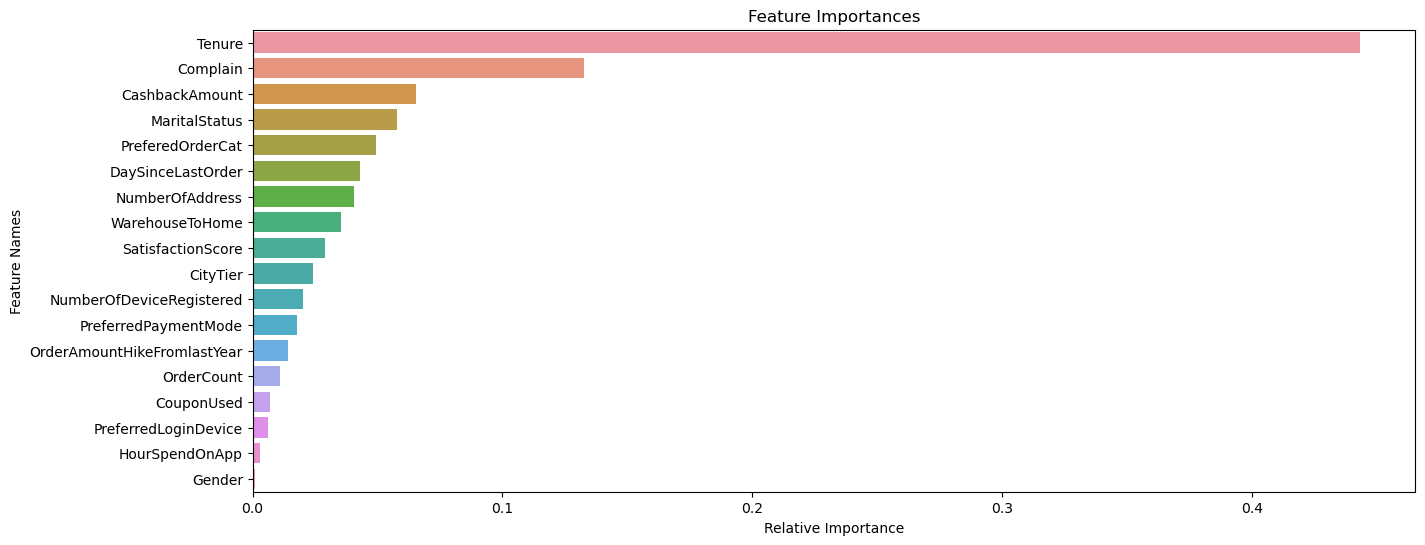

In [27]:
# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=x.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [29]:
#instantiate an instance of the bagging classifier, fit the model, and make a prediction

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, random_state=42)

bag_clf.fit(x_train, y_train)

y_pred_bag = bag_clf.predict(x_test)

In [30]:
#Returns the mean accuracy on the given test data and labels.
print("Accuracy:", f"{round(bag_clf.score(x_test, y_test), 4):.2%}")

Accuracy: 86.96%


In [31]:
#the random forrest and bagging classifier have almost identical predictions, agreeing 97.6% of the time
print("How do often do the random forrest and bagging classifier predict the same?:", f"{np.sum(y_pred == y_pred_bag) / len(y_pred):.2%}" " of the time.")

How do often do the random forrest and bagging classifier predict the same?: 97.32% of the time.


**ROC curve** <br>
Despite the use of alternative classifiers, the Random Forest classifier remains the most accurate. To visualize its performance, let's plot the Receiver Operating Characteristic (ROC) curve.

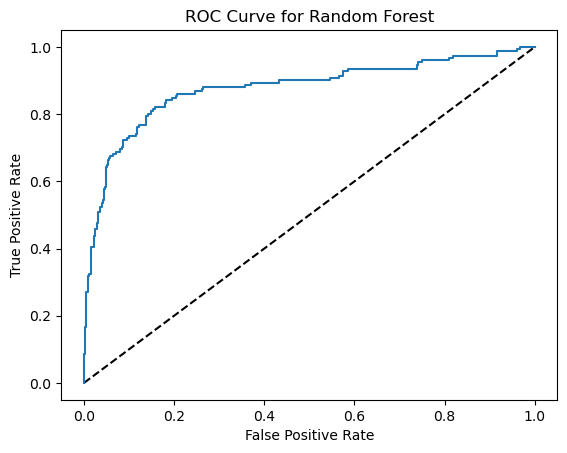

In [28]:
from sklearn.metrics import roc_curve

y_pred_prob = rf_clf.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()

In [32]:
 new_df = original_data

In [33]:
new_df.head()

,Customer_Id,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CustomerStatus,ComplainRecieved,warehousetohomerange,TenureRange,cashbackamountrange
0,50001,1,4.000000,phone,3,6,Debit Card,Female,3.00000,3,...,11,1,1,5,160,Churned,Yes,Very close distance,6 Months,Moderate Cashback Amount
1,50002,1,8.063592,Phone,1,8,UPI,Male,3.00000,4,...,15,2,1,4,121,Churned,Yes,Very close distance,1 Year,Moderate Cashback Amount
2,50003,1,8.063592,Phone,1,30,Debit Card,Male,2.00000,4,...,14,2,1,3,120,Churned,Yes,Moderate distance,1 Year,Moderate Cashback Amount
3,50004,1,0.000000,Phone,3,15,Debit Card,Male,2.00000,4,...,23,2,1,3,134,Churned,No,Close distance,6 Months,Moderate Cashback Amount
4,50005,1,0.000000,Phone,1,12,CC,Male,2.77242,3,...,11,1,1,3,130,Churned,No,Close distance,6 Months,Moderate Cashback Amount


In [34]:
# Retain the original DataFrame to preserve unencoded columns
original_df = new_df.copy()


In [36]:
# Retain the Customer_ID column
customer_ids = new_df['Customer_Id']


In [37]:
# Drop columns that won't be used for prediction in the encoded DataFrame
new_df = new_df.drop(['CustomerStatus','ComplainRecieved','warehousetohomerange','TenureRange','cashbackamountrange','Customer_Id'],axis =1)

In [41]:
# Encode categorical variables using the saved label encoders
le = LabelEncoder()


new_df['PreferredLoginDevice'] = le.fit_transform(new_df['PreferredLoginDevice'])
new_df['PreferredPaymentMode'] = le.fit_transform(new_df['PreferredPaymentMode'])
new_df['Gender'] = le.fit_transform(new_df['Gender'])
new_df['PreferedOrderCat'] = le.fit_transform(new_df['PreferedOrderCat'])
new_df['MaritalStatus'] = le.fit_transform(new_df['MaritalStatus'])


In [42]:
new_df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.000000,2,3,6,3,0,3.00000,3,2,2,2,9,1,11,1,1,5,160
1,1,8.063592,1,1,8,5,1,3.00000,4,3,3,2,7,1,15,2,1,4,121
2,1,8.063592,1,1,30,3,1,2.00000,4,3,3,2,6,1,14,2,1,3,120
3,1,0.000000,1,3,15,3,1,2.00000,4,2,5,2,8,0,23,2,1,3,134
4,1,0.000000,1,1,12,0,1,2.77242,3,3,5,2,3,0,11,1,1,3,130


In [45]:
# Drop columns that won't be used for prediction in the encoded DataFrame
new_df = new_df.drop(['Churn'],axis =1)

In [46]:
# Make predictions
new_predictions = rf_clf.predict(new_df)


In [47]:
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions


In [48]:
# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]


In [49]:
# Save the results
original_data.to_csv("Predictions.csv", index=False)


In [50]:
# Save the results
original_data.head()


,Customer_Id,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,CustomerStatus,ComplainRecieved,warehousetohomerange,TenureRange,cashbackamountrange,Customer_Status_Predicted
3,50004,1,0.0,Phone,3,15,Debit Card,Male,2.00000,4,...,2,1,3,134,Churned,No,Close distance,6 Months,Moderate Cashback Amount,1
5,50006,1,0.0,Computer,1,22,Debit Card,Female,3.00000,5,...,4,6,7,139,Churned,Yes,Moderate distance,6 Months,Moderate Cashback Amount,1
11,50013,1,0.0,Phone,1,11,Cash on Delivery,Male,2.00000,3,...,2,2,2,134,Churned,Yes,Close distance,6 Months,Moderate Cashback Amount,1
15,50017,1,0.0,Computer,1,12,Debit Card,Female,2.77242,4,...,1,1,4,129,Churned,Yes,Close distance,6 Months,Moderate Cashback Amount,1
16,50018,1,0.0,phone,3,11,E wallet,Male,2.00000,4,...,1,1,3,157,Churned,Yes,Close distance,6 Months,Moderate Cashback Amount,1
